In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

## 1. Importing Microsoft data from yahoo finance

In [2]:
#pip install yfinance

In [3]:
# Get the data for Microsoft
ticker ="MSFT"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,238.470001,242.839996,238.050003,242.350006,235.693481,30338000
2021-04-05,242.759995,249.960007,242.699997,249.070007,242.228897,36910600
2021-04-06,247.610001,249.399994,246.880005,247.860001,241.052109,22931900
2021-04-07,247.809998,250.929993,247.190002,249.899994,243.036087,22719800
2021-04-08,252.770004,254.139999,252.000000,253.250000,246.294098,23625200


## 2. Selecting the Target Variable and Cleaning the data

In [5]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


### 2.1 Ploting the time series data

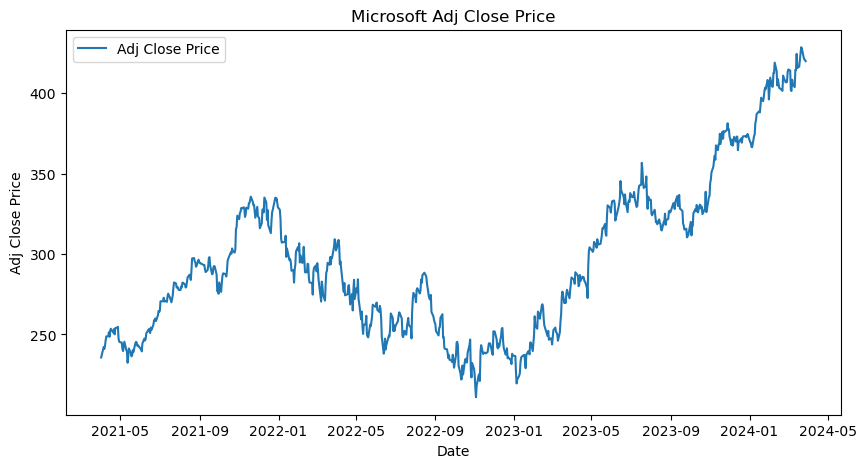

In [6]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('Microsoft Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

### 2.2 Decomposition of Time series

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
df.columns

Index(['Adj Close'], dtype='object')

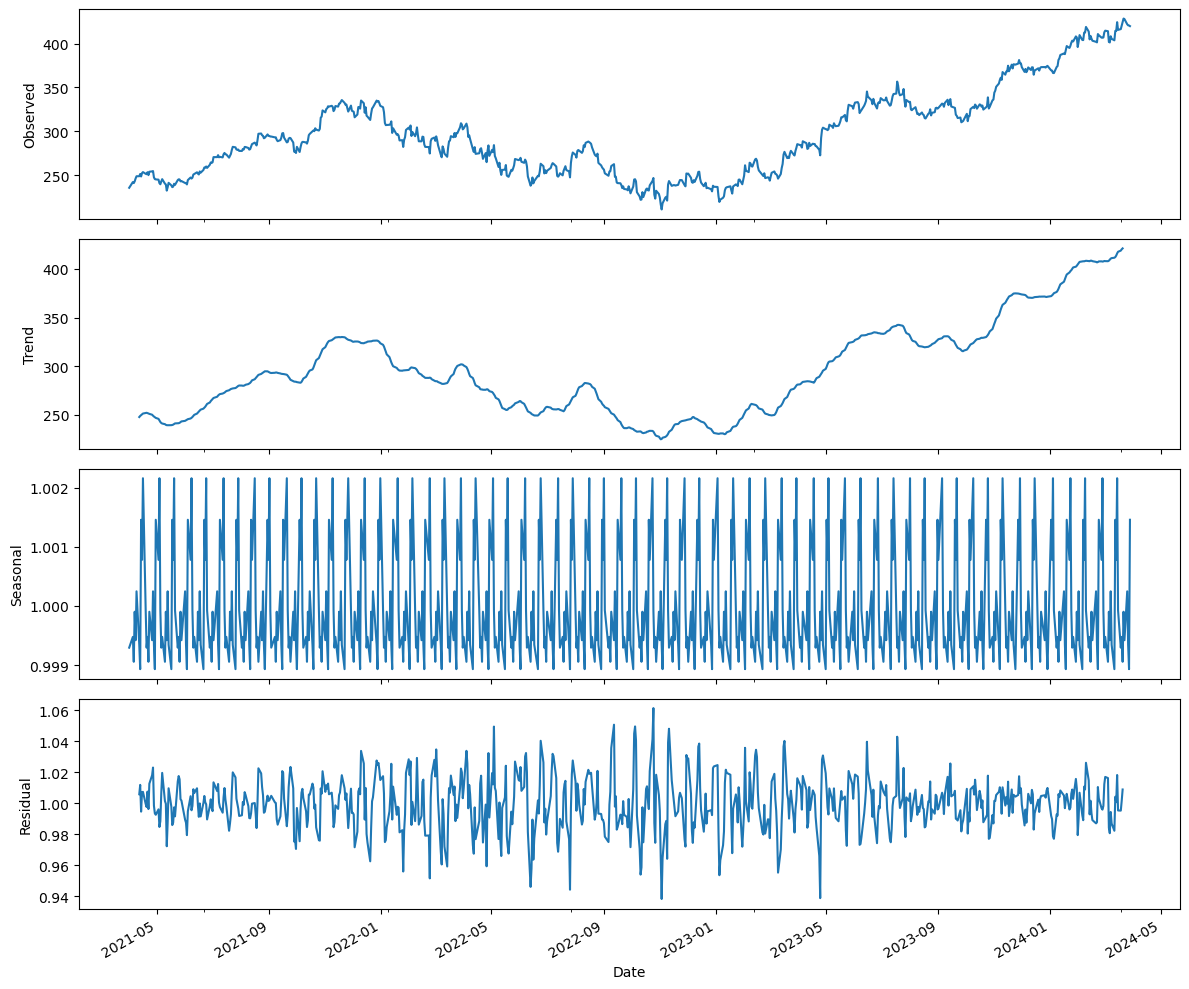

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [10]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

## 3. Univariate Forecasting 

### 3.1 HW Model

In [11]:
monthly_data = df.resample("M").mean()

In [12]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [13]:
len(monthly_data), len(train_data)

(36, 28)

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

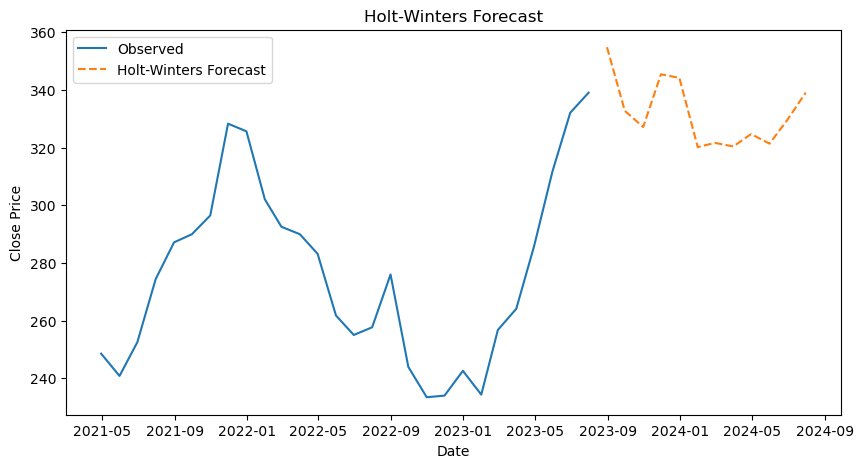

In [15]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [16]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [17]:
len(test_data), len(y_pred)

(8, 8)

In [18]:
y_pred, test_data

(2023-08-31    354.788317
 2023-09-30    332.726186
 2023-10-31    327.133393
 2023-11-30    345.394739
 2023-12-31    344.174044
 2024-01-31    320.153610
 2024-02-29    321.627405
 2024-03-31    320.381606
 Freq: M, dtype: float64,
              Adj Close
 Date                  
 2023-08-31  322.323266
 2023-09-30  324.196223
 2023-10-31  327.080085
 2023-11-30  366.660745
 2023-12-31  371.220703
 2024-01-31  388.031237
 2024-02-29  407.917078
 2024-03-31  416.039078)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 54.215010904651
MAE: 42.398219836717395
MAPE: nan
R-squared: -1.3652686961361655


In [20]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [21]:
holt_winters_forecast

2023-08-31    354.788317
2023-09-30    332.726186
2023-10-31    327.133393
2023-11-30    345.394739
2023-12-31    344.174044
2024-01-31    320.153610
2024-02-29    321.627405
2024-03-31    320.381606
2024-04-30    324.686584
2024-05-31    321.350612
2024-06-30    329.569171
2024-07-31    339.039800
2024-08-31    354.788317
2024-09-30    332.726186
2024-10-31    327.133393
2024-11-30    345.394739
2024-12-31    344.174044
2025-01-31    320.153610
2025-02-28    321.627405
2025-03-31    320.381606
Freq: M, dtype: float64

### 3.2 ARIMA Montly Data

In [22]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [23]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [24]:
from pmdarima import auto_arima

In [26]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -111.331
Date:                Mon, 22 Jul 2024   AIC                            232.661
Time:                        22:03:31   BIC                            239.322
Sample:                    04-30-2021   HQIC                           234.698
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.8783     15.992      2.243      0.025       4.534      67.222
ar.L1          1.8014      0.086     20.974      0.000       1.633       1.970
ar.L2         -0.9313      0.095     -9.827      0.0

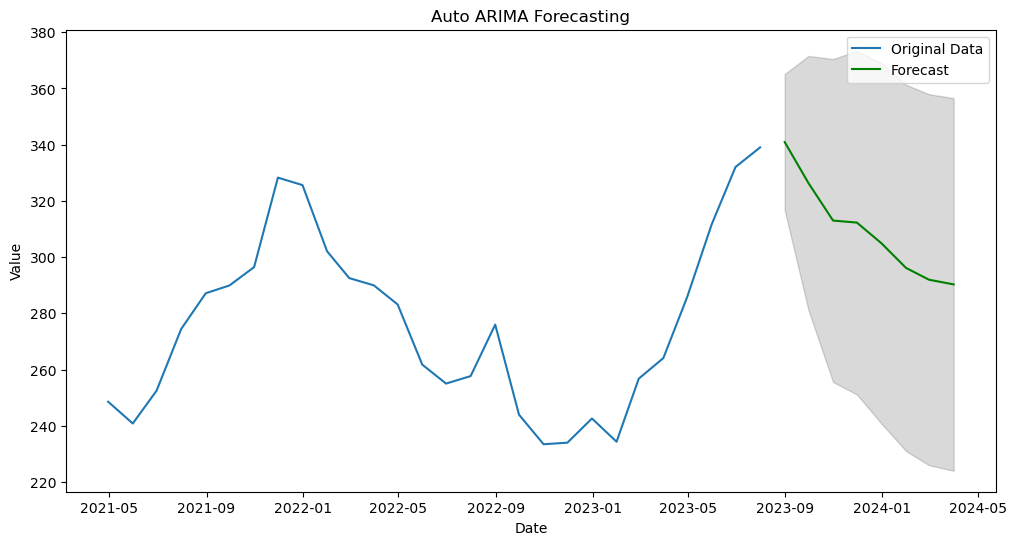

In [31]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [32]:
len(forecast)

8

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 75.49286287207902
MAE: 61.12969650005739
MAPE: nan
R-squared: -3.5862020378816224


### 3.3 ARIMA Daily Data

In [34]:
daily_data= df.copy()

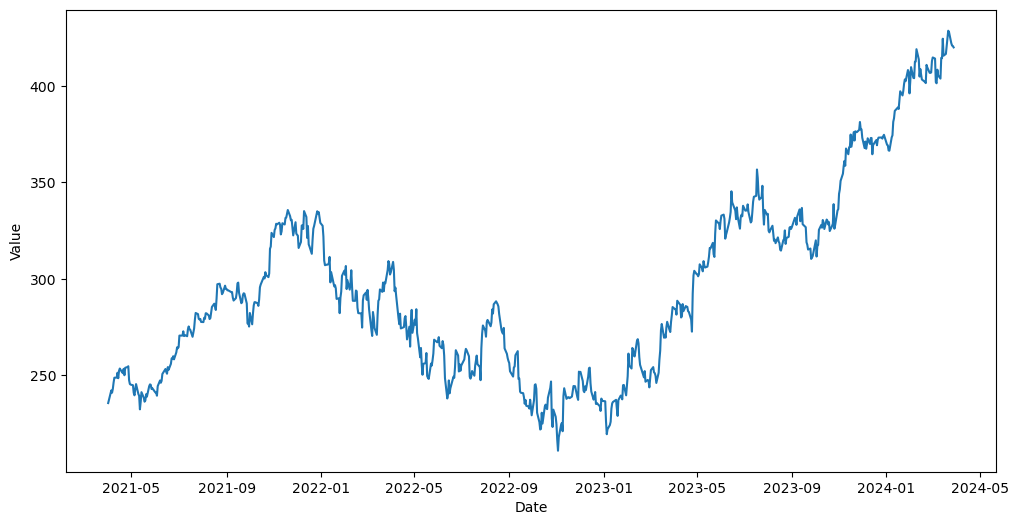

In [35]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [36]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [37]:
# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  753
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -2250.841
Date:                Mon, 22 Jul 2024   AIC                           4515.681
Time:                        17:58:08   BIC                           4548.041
Sample:                             0   HQIC                          4528.149
                                - 753                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4371      0.288      1.518      0.129      -0.127       1.002
ar.L1          0.1534      0.046      3.345      0.001       0.064       0.243
ar.L2         -0.9247      0.042    -21.898      0.0

In [38]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [39]:
fitted_values

Date
2021-04-01      0.246786
2021-04-05    235.940039
2021-04-06    242.219438
2021-04-07    241.090207
2021-04-08    242.901829
                 ...    
2024-03-22    427.640636
2024-03-25    428.168051
2024-03-26    423.328745
2024-03-27    421.524911
2024-03-28    420.686182
Name: predicted_mean, Length: 753, dtype: float64

In [40]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\Chand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Chand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [41]:
len(forecast)

60

In [44]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

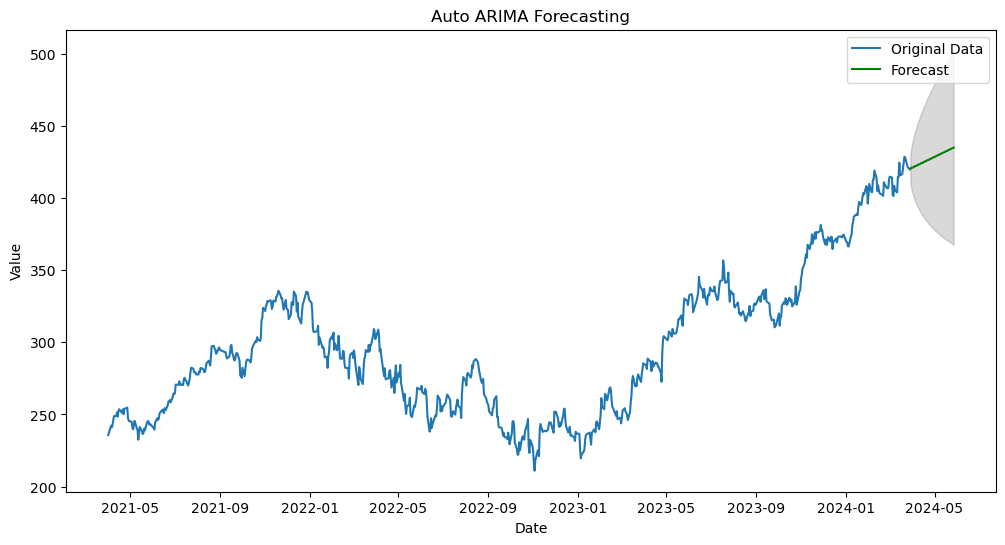

In [45]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

### 2. Multivariate Forecasting - Machine Learning Models

In [46]:
# pip install tensorflow

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [48]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,238.470001,242.839996,238.050003,242.350006,235.693481,30338000
2021-04-05,242.759995,249.960007,242.699997,249.070007,242.228912,36910600
2021-04-06,247.610001,249.399994,246.880005,247.860001,241.052124,22931900
2021-04-07,247.809998,250.929993,247.190002,249.899994,243.036102,22719800
2021-04-08,252.770004,254.139999,252.000000,253.250000,246.294083,23625200


In [49]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [50]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (723, 30, 6)
Shape of y: (723,)


In [51]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\Chand\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - loss: 0.0372 - val_loss: 0.0377
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0050 - val_loss: 0.0120
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0041 - val_loss: 0.0101
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0033 - val_loss: 0.0057
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0037 - val_loss: 0.0089
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0044 - val_loss: 0.0122
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0044 - val_loss: 0.0098
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0039 - val_loss: 0.0101
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0035 - val_loss: 0.0082
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0031 - val_loss: 0.0064
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0

In [54]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step


In [55]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 322.0478050945767, True Value: 325.9045104980469
Prediction: 322.70619438028007, True Value: 326.79937744140625
Prediction: 323.76286229776997, True Value: 331.6617126464844
Prediction: 324.96036998543605, True Value: 330.9955139160156
Prediction: 326.2118063741236, True Value: 328.0423583984375
Prediction: 327.0328248041533, True Value: 332.37762451171875
Prediction: 327.81327349469393, True Value: 336.0268859863281
Prediction: 329.1411542710248, True Value: 329.89178466796875
Prediction: 329.97044747528525, True Value: 334.15753173828125
Prediction: 330.6923372227975, True Value: 336.7825622558594


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 12.922718833902335
MAE: 11.096439999723946
MAPE: 3.029294154611001
R-squared: 0.8600056237981607


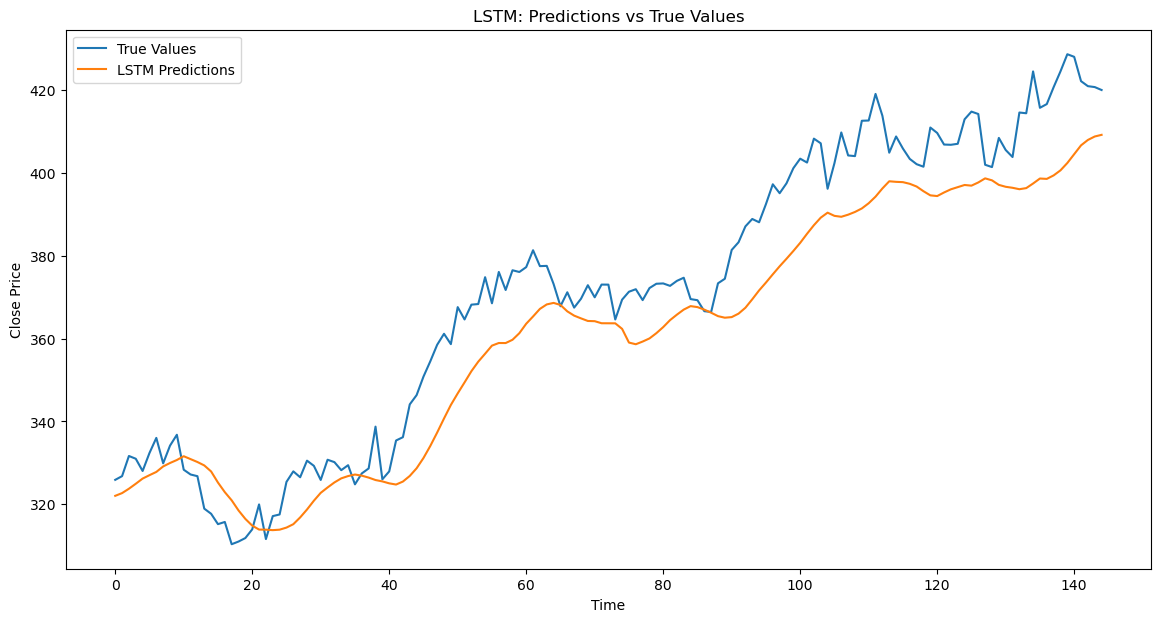

In [57]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### Tree Based Models

In [71]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [72]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [73]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [74]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.0009656283080940247


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.03107456046501744
MAE: 0.022440137602778278
MAPE: 134205.600303805
R-squared: 0.9818115509646183


In [76]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0005323999005418951


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.024151390597987217
MAE: 0.01859985974973844
MAPE: 131828.7580553687
R-squared: 0.9890132317921722


In [65]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.20036102475379924, True Value: 0.17184782488265848
Prediction: 0.5793911553563482, True Value: 0.5622001949718798
Prediction: 0.525779358085029, True Value: 0.4731830919465898
Prediction: 0.24388496967641715, True Value: 0.24702090064330062
Prediction: 0.26175290406701923, True Value: 0.22444542337101625
Prediction: 0.19571554132886337, True Value: 0.2028867394578513
Prediction: 0.3891604779012936, True Value: 0.34324517524538734
Prediction: 0.42511190687463096, True Value: 0.4137566391347074
Prediction: 0.24464342739863998, True Value: 0.23256784921838047
Prediction: 0.31238458518828005, True Value: 0.33213183420125403


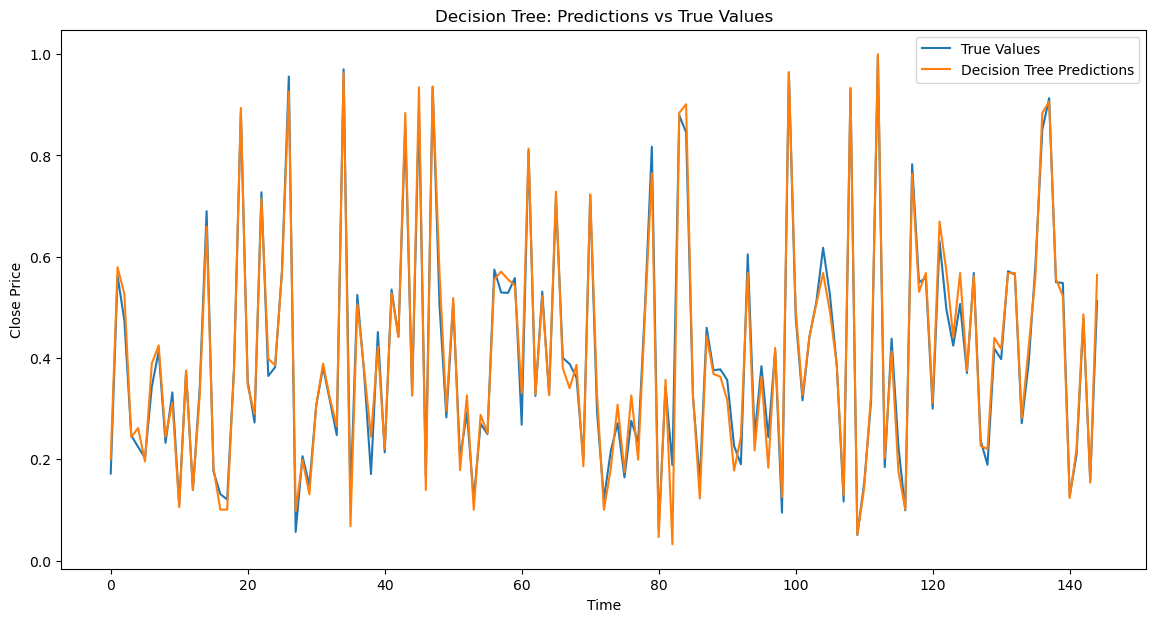

In [66]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [77]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.16583361277619776, True Value: 0.17184782488265848
Prediction: 0.5476055175555331, True Value: 0.5622001949718798
Prediction: 0.47638450580827424, True Value: 0.4731830919465898
Prediction: 0.25809592891366223, True Value: 0.24702090064330062
Prediction: 0.23030797268374115, True Value: 0.22444542337101625
Prediction: 0.22576419594295247, True Value: 0.2028867394578513
Prediction: 0.34662901165301285, True Value: 0.34324517524538734
Prediction: 0.41609309984391885, True Value: 0.4137566391347074
Prediction: 0.20507768581758384, True Value: 0.23256784921838047
Prediction: 0.32537366454710837, True Value: 0.33213183420125403


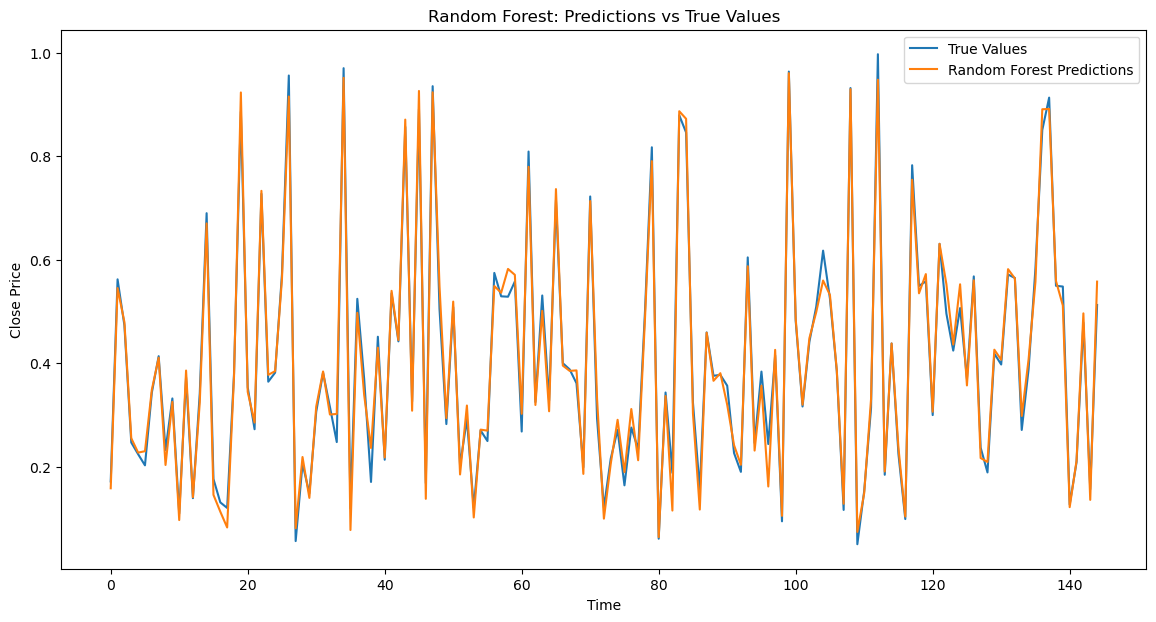

In [68]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

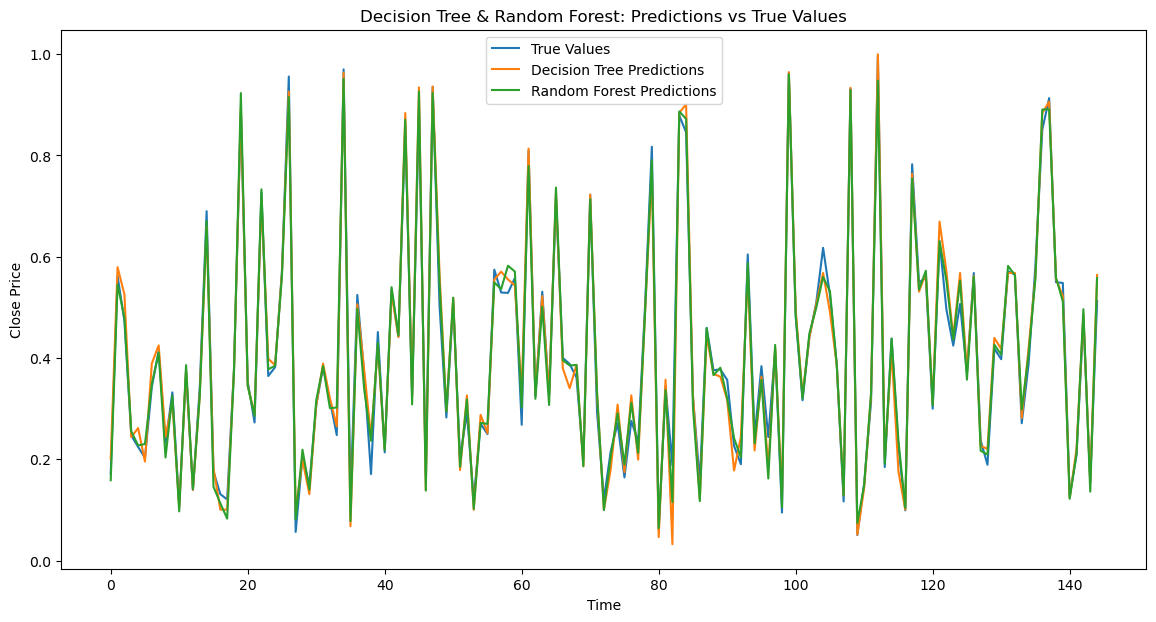

In [69]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()